# Validation of the tSZ and kSZ effect

## Comparison of the tSZ and kSZ effect against SZpack

An obvious candidate for validating the tSZ and kSZ signals of `MockSZ` is the well-established `SZpack` [Chluba, 2012](https://www.jb.man.ac.uk/~jchluba/Science/SZpack/SZpack.html). 

We start by generating a purely thermal SZ signal, and compare this to a similar signal generated by `SZpack`. We set $T_e=15.33$ keV, $\tau_e=0.01$, and $v_\mathrm{pec}=0.01c \sim 3000$ km/s. To provide a comparison closest to `MockSZ`, we calculate the `SZpack` signal using the 3D integral mode.


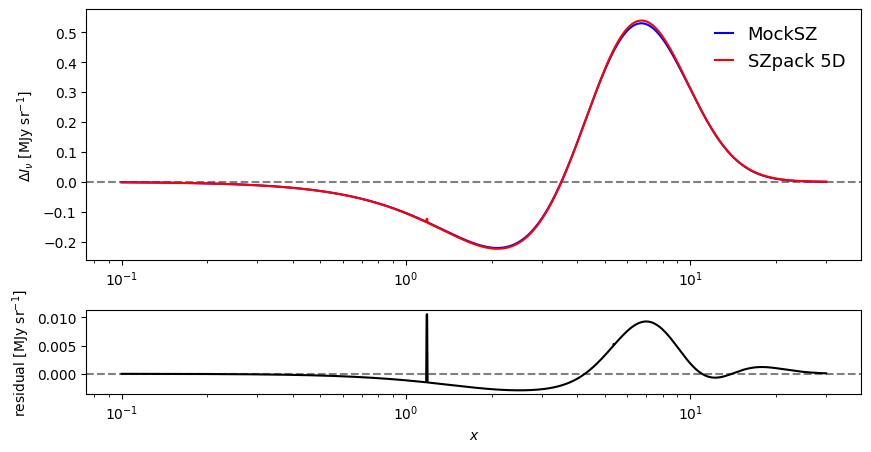

In [5]:
import matplotlib
import os

import numpy as np
import matplotlib.pyplot as pt

import MockSZ.Models as MModels
import MockSZ.Conversions as MConv

%matplotlib inline

xmin = 0.1                                                                                
xmax = 30                                                                                 
npts = 1500                                                                              
                                                                                          
tau_e = 0.01                                                                              
Te = 15.33           
beta_z = -0.01   
v_pec = beta_z * 3e8 * 1e-3

simObj = MModels.SinglePointing(Te, v_pec, tau_e=tau_e, no_CMB=True)

x_mock = np.logspace(np.log10(xmin), np.log10(xmax), npts)                               
nu_test = MConv.x_freq(x_mock)      
                                                                                          
I_tSZ = simObj.getSingleSignal_tSZ(nu_test)  
I_kSZ = simObj.getSingleSignal_kSZ(nu_test) 
I_mock = MConv.SI_JySr(I_tSZ + I_kSZ) * 1e-6

# Read cluster simulated with SZpack        
name = os.path.join("resources", "SZ_Integral.5D.dat")

I_pack = []   
x_pack = []
with open(name, "r") as file:                                                             
    for line in file:                                                                     
        if line[0] == "#":                                                                
            continue                                                                      
        line = [float(x) for x in line.split(" ")]                                        
                                                               
        I_pack.append(line[-1])
        x_pack.append(line[0])

I_pack = np.array(I_pack)
                                                                                          
fig, ax = pt.subplots(2,1, figsize=(10,5), gridspec_kw={'height_ratios': [3, 1], "hspace":0.3})                                                
ax[0].plot(x_mock, I_mock, color="blue", label="MockSZ")                                                                
ax[0].plot(x_pack, I_pack, color="red", label="SZpack 5D")   
ax[0].axhline(y=0, zorder=0, color="grey", ls="dashed")
ax[0].legend(frameon=False, prop={'size': 13},handlelength=1)

ax[0].set_xscale('log')
ax[0].set_ylabel(r"$\Delta I_\nu$ [MJy sr$^{-1}]$")
                                                        
ax[1].plot(x_pack, I_pack - I_mock, color="k")   
ax[1].axhline(y=0, zorder=0, color="grey", ls="dashed")

ax[1].set_xscale('log')
ax[1].set_xlabel("$x$")
ax[1].set_ylabel(r"residual [MJy sr$^{-1}$]")

pt.show()

We can see that the two curves are very close together, implying that `MockSZ` can simulate the tSZ and kSZ signals to a comparable accuracy as the 3D integral mode of `SZpack`. In fact, from the residuals we can see that the maximum discrepancy is on the order of 0.01 MJy/sr, which is about 2 % of the actual signal. Given that `MockSZ` will mostly be used for forecasting simulations, where the atmosphere imparts noise on the signal of significantly higher level than this 2 %, the discrepancy is negligible.